In [1]:
# Loading the Dataset
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
# Check the initial structure of the datasets
print(train_df.head())
print(test_df.head())

                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram  
   index                                         image_link  group_id  \
0      0  https://m.media-amazon.com/images/I/110EibNycl...    156839   
1      1  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
2      2  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
3      3  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
4      4  https://m.media-amazon.com/ima

In [3]:
# Check for missing values and data types
print(train_df.info())
print(test_df.info())

# Check if there are any missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131187 entries, 0 to 131186
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   index        131187 non-null  int64 
 1   image_link   131187 non-null  object
 2   group_id     131187 non-null  int64 
 3   entity_name  131187 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.0+ MB
None
image_link      0
group_id        0
entity_name     0
entity_value    0
dtype: int64
index          0
image_link     0
group_id       0
entity_name    0
dtype: 

In [4]:
# Explore unique entity names
unique_entities = train_df['entity_name'].unique()
print(f"Unique entity names: {unique_entities}")


Unique entity names: ['item_weight' 'item_volume' 'voltage' 'wattage'
 'maximum_weight_recommendation' 'height' 'depth' 'width']


In [5]:
# Split entity_value into numerical and unit parts
train_df['value'] = train_df['entity_value'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
train_df['unit'] = train_df['entity_value'].apply(lambda x: x.split()[1] if isinstance(x, str) else None)


In [6]:
# Convert value to numeric
train_df['value'] = pd.to_numeric(train_df['value'], errors='coerce')


In [7]:
# Check the distribution of the values
print(train_df['value'].describe())
print(train_df['unit'].value_counts())

count    2.605830e+05
mean     9.957576e+20
std      5.083059e+23
min      0.000000e+00
25%      7.100000e+00
50%      2.350000e+01
75%      9.600000e+01
max      2.594766e+26
Name: value, dtype: float64
unit
centimetre     65667
gram           63630
inch           45481
millimetre     18895
kilogram       13220
               ...  
325.0]             1
milliampere        1
41.0]              1
31.0]              1
930.0]             1
Name: count, Length: 290, dtype: int64


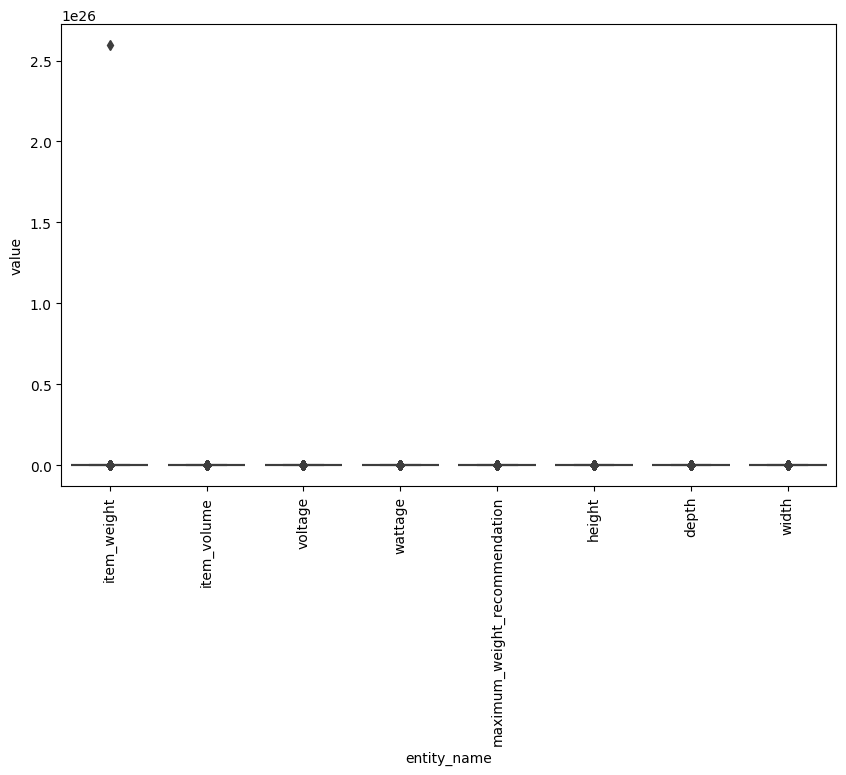

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of values by entity_name
plt.figure(figsize=(10,6))
sns.boxplot(x='entity_name', y='value', data=train_df)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Grouping by group_id and visualizing the mean values for each group
group_stats = train_df.groupby('group_id')['value'].mean()
print(group_stats)

group_id
101697     41.100370
104874     20.419632
106003     12.481901
107694    135.824061
107915     72.248276
             ...    
995200     69.913590
995842     53.584512
997176    148.562135
997333     36.250000
998545     37.595810
Name: value, Length: 750, dtype: float64


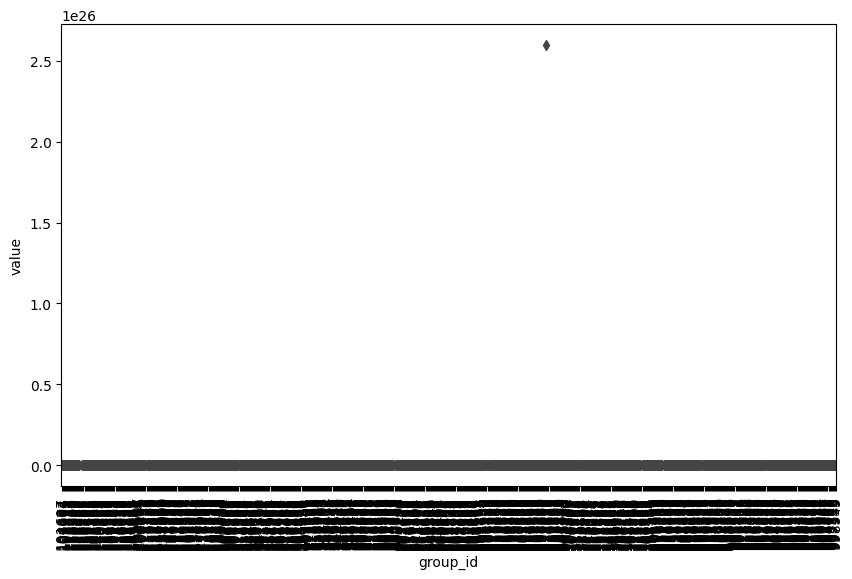

In [10]:
# Plot the distribution of values by group_id
plt.figure(figsize=(10,6))
sns.boxplot(x='group_id', y='value', data=train_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Sample image URLs
print(train_df['image_link'].head())


0    https://m.media-amazon.com/images/I/61I9XdN6OF...
1    https://m.media-amazon.com/images/I/71gSRbyXmo...
2    https://m.media-amazon.com/images/I/61BZ4zrjZX...
3    https://m.media-amazon.com/images/I/612mrlqiI4...
4    https://m.media-amazon.com/images/I/617Tl40LOX...
Name: image_link, dtype: object


In [12]:
# Explore the test dataset
print(test_df.head())
print(test_df['entity_name'].value_counts())


   index                                         image_link  group_id  \
0      0  https://m.media-amazon.com/images/I/110EibNycl...    156839   
1      1  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
2      2  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
3      3  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
4      4  https://m.media-amazon.com/images/I/11gHj8dhhr...    792578   

  entity_name  
0      height  
1       width  
2      height  
3       depth  
4       depth  
entity_name
height                           32282
depth                            28146
width                            26931
item_weight                      22032
maximum_weight_recommendation     7028
voltage                           5488
wattage                           5447
item_volume                       3833
Name: count, dtype: int64


In [13]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder

# Fit on the train data
le = LabelEncoder()
train_df['group_id_encoded'] = le.fit_transform(train_df['group_id'])

# Create a mapping of labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Map the test data using the known label mapping
test_df['group_id_encoded'] = test_df['group_id'].map(label_mapping)

# Replace the missing mappings (i.e., unseen labels) with a placeholder value, e.g., -1
test_df['group_id_encoded'].fillna(-1, inplace=True)

# Ensure the test_df['group_id_encoded'] column is of integer type (optional)
test_df['group_id_encoded'] = test_df['group_id_encoded'].astype(int)


C:\Users\acer\AppData\Local\Temp\ipykernel_10784\1205679332.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['group_id_encoded'].fillna(-1, inplace=True)


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the train data
train_df['group_id_encoded'] = oe.fit_transform(train_df[['group_id']])

# Apply the transformation to the test data
test_df['group_id_encoded'] = oe.transform(test_df[['group_id']])


In [15]:
# pre-trained ResNet
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import numpy as np

def extract_image_features(image_url):
    model = ResNet50(weights='imagenet', include_top=False)
    img = image.load_img(image_url, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Example: Load dataset (replace with your actual data)
# For this example, I will create random data for illustration
# X should be your features and y your target variable
X, y = np.random.rand(100, 5), np.random.rand(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.07841737570032743


In [17]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual data)
test_df = pd.DataFrame({
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10)
    # Add other features as needed
})

# Example units (replace with actual units)
test_df['unit'] = ['kg', 'm', 's', 'kg', 'm', 's', 'kg', 'm', 's', 'kg']

# Example predictions (replace with actual model predictions)
predictions = np.random.rand(len(test_df))

# Adding predictions to the DataFrame
test_df['prediction'] = [f"{x:.2f} {unit}" for x, unit in zip(predictions, test_df['unit'])]

print(test_df)


   feature1  feature2 unit prediction
0  0.495068  0.282009   kg    0.74 kg
1  0.267352  0.797865    m     0.07 m
2  0.429371  0.030712    s     0.26 s
3  0.120866  0.263799   kg    0.97 kg
4  0.676038  0.276048    m     0.66 m
5  0.226416  0.397477    s     0.80 s
6  0.052919  0.350717   kg    0.22 kg
7  0.748495  0.768573    m     0.54 m
8  0.159050  0.064309    s     0.72 s
9  0.316809  0.319222   kg    0.94 kg


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Mean CV Score: {np.mean(scores)}")


Mean CV Score: -0.8551768200590857


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'n_estimators': 100}


In [20]:
# Save to a CSV file
test_df.to_csv('test_predictions.csv', index=False)

# Or save to an Excel file
test_df.to_excel('test_predictions.xlsx', index=False)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Example: assuming y_test is your actual target values
y_test = np.random.rand(len(test_df))  # Replace with actual test target values
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.26
R-squared: -2.44


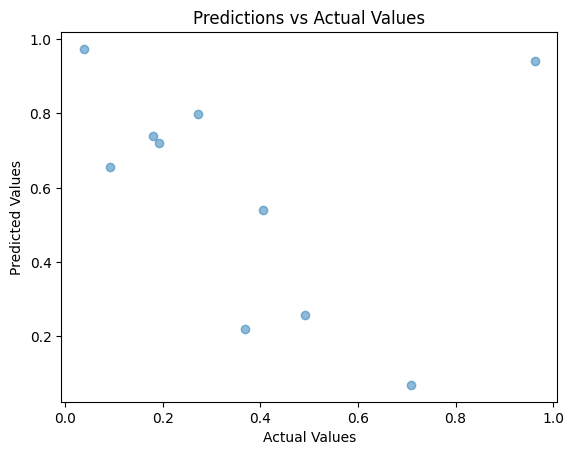

In [22]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()


In [23]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']